In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/raw/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.shape

(1000, 8)

# Analalisis por columnas

1. ¿Cuantos hombres y mujeres hay?

In [6]:
df_gender = df["gender"].value_counts().reset_index()
df_gender["h"] = df_gender["count"] / df_gender["count"].sum() 
df_gender["h%"] = df_gender["h"] * 100 
df_gender


,gender,count,h,h%
0,female,518,0.518,51.8
1,male,482,0.482,48.2


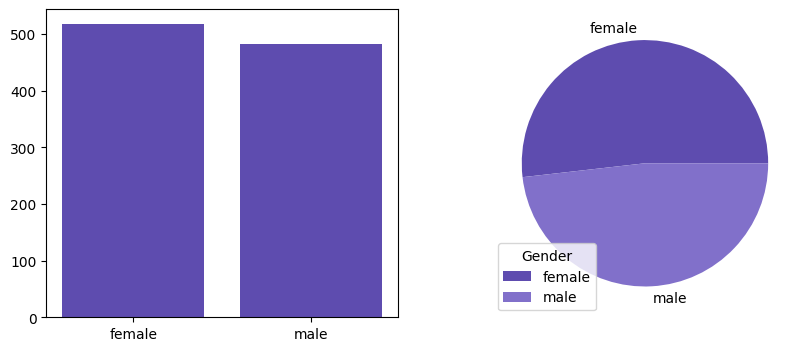

In [7]:
values = df_gender["count"].to_numpy()
labels_gender = df_gender["gender"].to_numpy()

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(labels_gender,values,color="#5E4CAF")
ax[1].pie(values, labels=labels_gender, colors =["#5E4CAF","#8170CA"])
ax[1].legend(title="Gender")

"Se observa que hay una mayor cantidad de mujeres que de hombres, representan el 51.8% y 48.2% respectivamente del total de estudiantes registrados"

2. ¿Cuantas personas hay en cada grupo etnico?

In [8]:
df_race = df["race/ethnicity"].value_counts().reset_index()
df_race["h"] = df_race["count"] / df_race["count"].sum()
df_race["h%"] = df_race["h"] * 100


df_race

,race/ethnicity,count,h,h%
0,group C,319,0.319,31.9
1,group D,262,0.262,26.2
2,group B,190,0.190,19.0
3,group E,140,0.140,14.0
4,group A,89,0.089,8.9


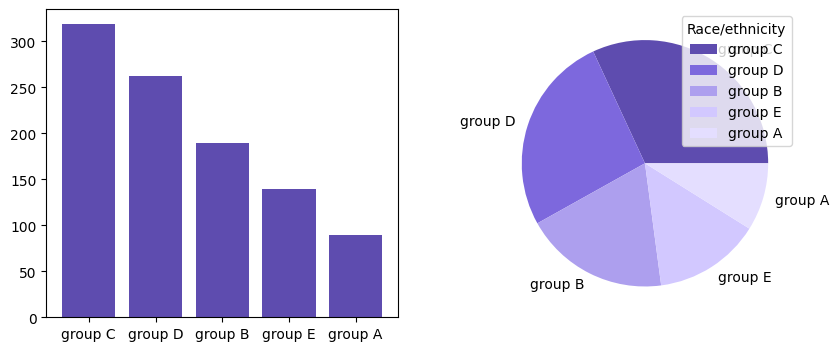

In [9]:
values_count = df_race["count"].to_numpy()
values_hp = df_race["h%"].to_numpy()
labels_race = df_race["race/ethnicity"].to_numpy()

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].bar(labels_race,values_count, color="#5E4CAF")
ax[1].pie(values_hp,labels=labels_race, colors=["#5E4CAF","#7D68DD","#AD9FEE","#D2C8FF","#E4DEFF"])
ax[1].legend(title="Race/ethnicity")


"Hay mas peronas en el grupo C, mientras que en el grupo A representa la minoria de la muestra de estudiantes."

3. ¿Que grupo tiene el mayor promedio de notas?

In [10]:
df_nr = df.groupby("race/ethnicity")[["math score","reading score","writing score"]].mean()

df_nr

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


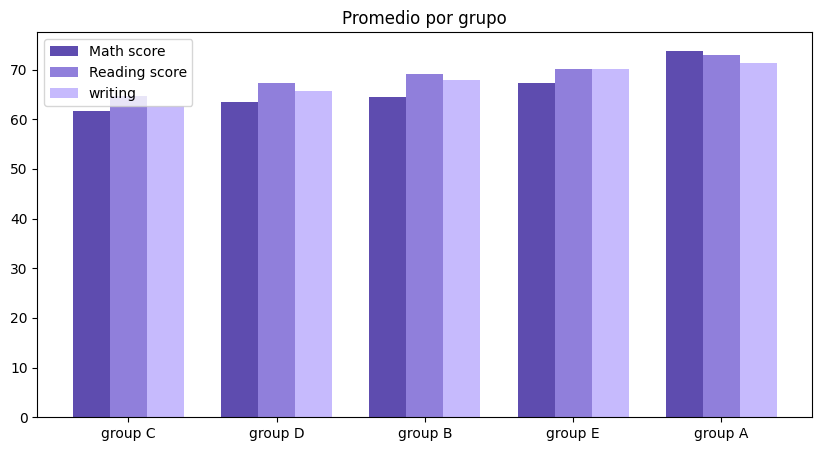

In [11]:
groups = labels_race
math = df_nr["math score"].to_numpy()
reading = df_nr["reading score"].to_numpy()
writing = df_nr["writing score"].to_numpy()

x = np.arange(len(groups))
width = 0.25

fig,ax =plt.subplots(figsize=(10,5))

ax.bar(x-width, math,width,color="#5E4CAF",label="Math score")
ax.bar(x,reading,width, color="#907FDB",label="Reading score")
ax.bar(x+width,writing,width, color="#C6BAFD",label="writing")

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_title("Promedio por grupo")
ax.legend()
plt.show()

4. Cuantos hombres y mujeres hay en cada grupo?

In [12]:
df_rg = df.groupby(["race/ethnicity","gender"]).size().unstack()
df_rg

gender,female,male
race/ethnicity,,
group A,36,53
group B,104,86
group C,180,139
group D,129,133
group E,69,71


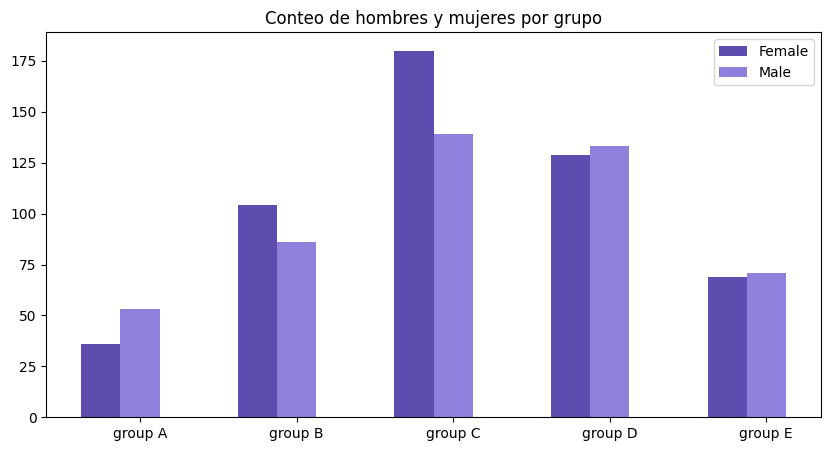

In [13]:

groups = df_rg.index
female = df_rg["female"].to_numpy()
male = df_rg["male"].to_numpy()


x = np.arange(len(groups))
width = 0.25

fig,ax =plt.subplots(figsize=(10,5))
ax.bar(x-width, female, width,color="#5E4CAF",label="Female")
ax.bar(x,male,width, color="#907FDB",label="Male")

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_title("Conteo de hombres y mujeres por grupo")
ax.legend()
plt.show()

5. El desempeño en las tres pruebas estan relacionadas entre si? 

* Math Score vs Reading Score
* Reading Score vs Writing Score
* Writing Score vs Math Score

In [16]:
df_score = df[["math score","reading score", "writing score"]]
df_score.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


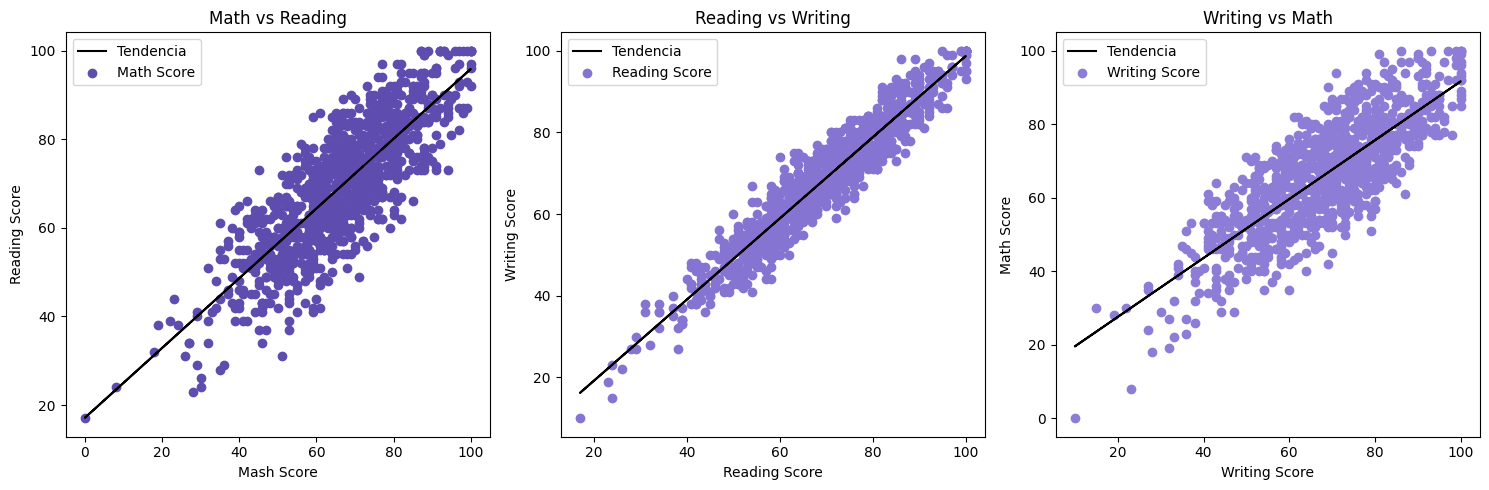

In [ ]:
math = df_score["math score"].to_numpy()
reading = df_score["reading score"].to_numpy()
writing = df_score["writing score"].to_numpy()
score = df_score.columns.values

fig,ax =plt.subplots(1,3,figsize=(15,5))



m, b = np.polyfit(math,reading,1)

ax[0].set_title("Math vs Reading")
ax[0].plot(math,m*math + b, color="#050000", linestyle="-",label="Tendencia")


ax[0].set_xlabel("Mash Score")
ax[0].set_ylabel("Reading Score")
ax[0].scatter(math,reading, color = "#5E4CAF", label="Math Score")
ax[0].legend()

m, b = np.polyfit(reading,writing,1)
ax[1].plot(reading,m*reading + b, color="#050000", linestyle="-",label="Tendencia")

ax[1].set_title("Reading vs Writing")
ax[1].set_xlabel("Reading Score")
ax[1].set_ylabel("Writing Score")
ax[1].scatter(reading,writing, color = "#5E4CAF", label="Reading Score")
ax[1].legend()


m, b = np.polyfit(writing,math,1)
ax[2].plot(writing,m*writing + b, color="#050000", linestyle="-",label="Tendencia")

ax[2].set_title("Writing vs Math")
ax[2].set_xlabel("Writing Score")
ax[2].set_ylabel("Math Score")
ax[2].scatter(writing,math, color = "#5E4CAF", label="Writing Score")
ax[2].legend()

plt.tight_layout()
plt.show()

